# Car Dekho Data Set-Regression

*importing required Libraries*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

### 1: EDA on Car Dekho DataSet

In [3]:
car=pd.read_csv('Car-details-v3.csv')
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
car.shape

(8128, 13)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
car.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [8]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [46]:
car_f= car.drop(['name'],axis=1)
car_f.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
z=car_f[car_f['year']==2014]['selling_price']
z

0        450000
1        370000
10       500000
47      1500000
49      1450000
         ...   
8072     450000
8073     400000
8075     560000
8111     425000
8122     475000
Name: selling_price, Length: 621, dtype: int64

C:\Users\ALISHA ANJUM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

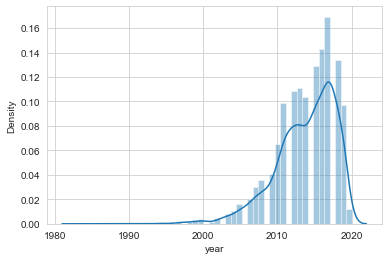

In [14]:
sns.distplot(car_f['year'])
# The Years variable is left skewed


C:\Users\ALISHA ANJUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

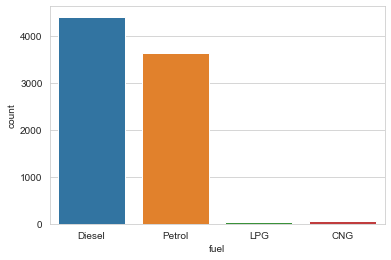

In [15]:
sns.countplot(car_f['fuel'])
# From this bar plot we can see that there are four categories of Fuel_Type
#Diesel Fuel_type is the maximum in number 

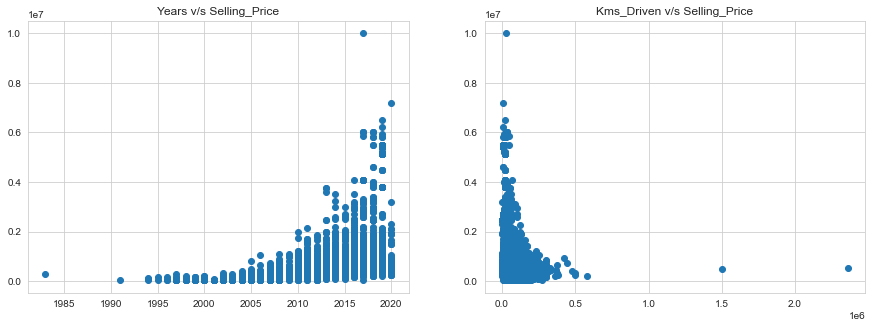

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))

#scatter plot 1
ax1.scatter(x=car['year'],y= car['selling_price'])
ax1.set_title('Years v/s Selling_Price')

#scatter plot 2
ax2.scatter(x=car['km_driven'],y=car['selling_price'])
ax2.set_title('Kms_Driven v/s Selling_Price')

plt.draw()  


The older the car the lesser the selling price,   
As the Km_Driven increases the Selling_price of the car decreases

### 2: Statistical Analysis on Car Dekho DataSet

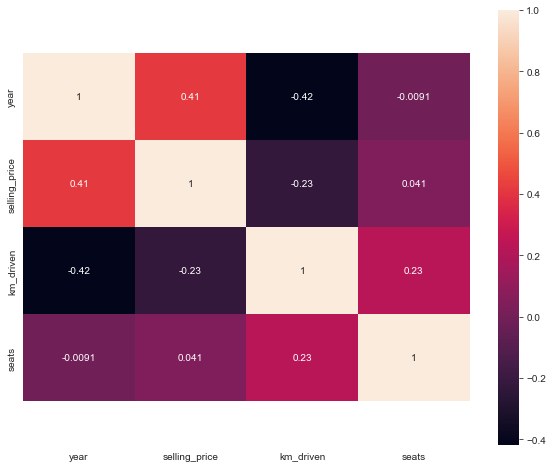

In [8]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = car.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

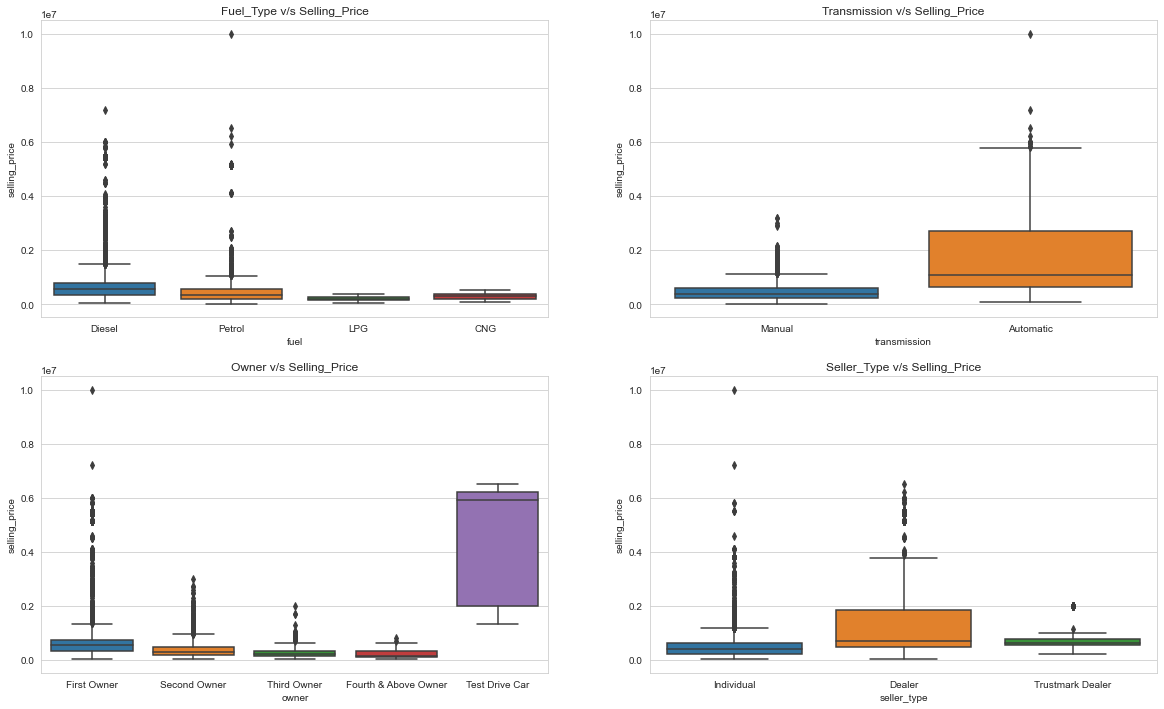

In [10]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=car.fuel,y=car.selling_price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=car.transmission,y=car.selling_price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=car.owner,y=car.selling_price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=car.seller_type,y=car.selling_price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

The Diesel cars are having the highest selling_price with most number of outliers being present.

Automatic cars are expesnive than manual cars

Test Drive Cars are Expensive

Individuals are selling there cars at lesser price than the cars being sold by the dealers

<AxesSubplot:ylabel='Count'>

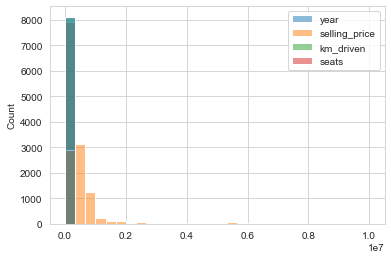

In [12]:
sns.histplot(data=car,bins=30)


### 3: Build the model for Car Dekho DataSet

In [47]:
car_f = pd.get_dummies(car_f,columns=['fuel','seller_type','transmission'],drop_first=True)
y = car_f['selling_price']
X = car_f.drop(['selling_price','owner','mileage','engine','max_power','torque','seats'],axis=1)
car_f


,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,0,0,1,0,1
1,2014,370000,120000,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,1
2,2006,158000,140000,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,1,1,0,1
3,2010,225000,127000,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0,0,1,0,1
4,2007,130000,120000,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,0,0,1,1,0,1
8124,2007,135000,119000,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1,0,0,1,0,1
8125,2009,382000,120000,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1,0,0,1,0,1
8126,2013,290000,25000,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1,0,0,1,0,1


In [48]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5689, 8)
(2439, 8)
(5689,)
(2439,)


### 4: Test on New Data on Car Dekho DataSet

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 4.45949587e+04 -1.21101597e+00  3.22321838e+05  1.20339518e+05
 -2.92265322e+04 -3.99369440e+05 -5.18925485e+05 -1.14531593e+06]


Text(0, 0.5, 'Predicted Y')

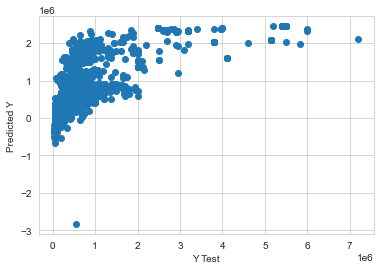

In [51]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\ALISHA ANJUM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


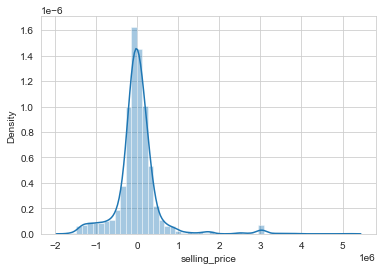

In [53]:
sns.distplot((y_test-predictions),bins=50);

In [54]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
year,4.459496e+04
km_driven,-1.211016e+00
fuel_Diesel,3.223218e+05
fuel_LPG,1.203395e+05
fuel_Petrol,-2.922653e+04
seller_type_Individual,-3.993694e+05
seller_type_Trustmark Dealer,-5.189255e+05
transmission_Manual,-1.145316e+06


In [55]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 305012.9677983981
MSE: 298348042728.4739
RMSE: 546212.4520078922
